<a href="https://colab.research.google.com/github/andressriosg/Estadistica-I-y-II/blob/main/regresionenpython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import io
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from scipy.stats import spearmanr, kendalltau

In [ ]:
from google.colab import files # Para cargar archivos en google colab
uploaded = files.upload()

Saving natalidad.csv to natalidad.csv


In [ ]:
bites = io.BytesIO(uploaded['natalidad.csv'])
tabla_nac_med = pd.read_csv(bites, sep = ";", index_col=0, encoding="latin-1")
tabla_nac_med.head(4)

<ipython-input-10-a88ef620722c>:2: DtypeWarning: Columns (4,14,22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  tabla_nac_med = pd.read_csv(bites, sep = ";", index_col=0, encoding="latin-1")


,areanac,cod_insp,sit_parto,otro_sit,nom_inst,cod_inst,sexo,peso_nac,talla_nac,fecha_nac,...,n_emb,seg_social,idclasadmi,nomclasad,codclasad,edad_padre,niv_edup,ultcurpad,barrio_res,comuna_res
id,,,,,,,,,,,,,,,,,,,,,
1,1,NaN,1,NaN,PROMOTORA MEDICA LAS AMERICAS S.A,5.001021e+10,2,1070,38,23/04/2012,...,4,1,1.0,COOMEVA E.P.S. S.A.,EPS016,42,4,11,El RincÃ³n,16 Belen
2,1,NaN,1,NaN,CLINICA DEL PRADO S.A.,5.001046e+10,2,2900,47,30/05/2012,...,1,1,1.0,SALUD TOTAL S.A. ENTIDAD PROMOTORA DE SALUD,EPS002,25,99,9,Versalles N.2,03 Manrique
3,1,NaN,1,NaN,CLINICA UNIVERSITARIA BOLIVARIANA,5.001034e+10,2,2510,48,04/06/2012,...,2,5,NaN,NaN,NaN,34,8,3,Santa MÃ³nica,12 La America
4,1,NaN,1,NaN,UNIDAD HOSPITALARIA DE MANRRIQUE HERMENEGILDO ...,5.001022e+10,1,3400,50,25/09/2012,...,1,5,NaN,NaN,NaN,24,99,9,Enciso,08 Villa Hermosa


In [ ]:
tabla_nac_med.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196729 entries, 1 to 196729
Data columns (total 40 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   areanac       196729 non-null  int64  
 1   cod_insp      18 non-null      float64
 2   sit_parto     196729 non-null  int64  
 3   otro_sit      133 non-null     object 
 4   nom_inst      196686 non-null  object 
 5   cod_inst      196685 non-null  float64
 6   sexo          196729 non-null  int64  
 7   peso_nac      196729 non-null  int64  
 8   talla_nac     196729 non-null  int64  
 9   fecha_nac     196729 non-null  object 
 10  ano           196729 non-null  int64  
 11  mes           196729 non-null  int64  
 12  aten_par      196729 non-null  int64  
 13  otrparatx     360 non-null     object 
 14  t_ges         196729 non-null  int64  
 15  numconsul     196729 non-null  int64  
 16  tipo_parto    196729 non-null  int64  
 17  mul_parto     196729 non-null  int64  
 18  idhemocla

In [ ]:
tabla_nac_med.columns

Index(['areanac', 'cod_insp', 'sit_parto', 'otro_sit', 'nom_inst', 'cod_inst',
       'sexo', 'peso_nac', 'talla_nac', 'fecha_nac', 'ano', 'mes', 'aten_par',
       'otrparatx', 't_ges', 'numconsul', 'tipo_parto', 'mul_parto',
       'idhemoclas', 'idfactorrh', 'idpertet', 'nom_pueb', 'edad_madre',
       'est_civm', 'niv_edum', 'codptore', 'codmunre', 'cod_barrires',
       'n_hijosv', 'fecha_nacm', 'n_emb', 'seg_social', 'idclasadmi',
       'nomclasad', 'codclasad', 'edad_padre', 'niv_edup', 'ultcurpad',
       'barrio_res', 'comuna_res'],
      dtype='object')

In [ ]:
tabla_regresion = tabla_nac_med[['peso_nac', 't_ges', 'talla_nac', 'n_emb', 'n_hijosv', 'edad_madre', 'edad_padre']]
tabla_regresion.head(4)

,peso_nac,t_ges,talla_nac,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,,
1,1070,30,38,4,3,39,42
2,2900,40,47,1,1,21,25
3,2510,36,48,2,2,37,34
4,3400,41,50,1,1,22,24


from matplotlib import pyplot as plt
_df_0['peso_nac'].plot(kind='hist', bins=20, title='peso_nac')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['t_ges'].plot(kind='hist', bins=20, title='t_ges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['talla_nac'].plot(kind='hist', bins=20, title='talla_nac')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['n_emb'].plot(kind='hist', bins=20, title='n_emb')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='peso_nac', y='t_ges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='t_ges', y='talla_nac', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='talla_nac', y='n_emb', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='n_emb', y='n_hijosv', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talla_nac']
  ys = series['peso_nac']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('talla_nac', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talla_nac')
_ = plt.ylabel('peso_nac')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talla_nac']
  ys = series['t_ges']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('talla_nac', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talla_nac')
_ = plt.ylabel('t_ges')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talla_nac']
  ys = series['n_emb']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('talla_nac', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talla_nac')
_ = plt.ylabel('n_emb')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['talla_nac']
  ys = series['n_hijosv']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('talla_nac', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('talla_nac')
_ = plt.ylabel('n_hijosv')

from matplotlib import pyplot as plt
_df_12['peso_nac'].plot(kind='line', figsize=(8, 4), title='peso_nac')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['t_ges'].plot(kind='line', figsize=(8, 4), title='t_ges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['talla_nac'].plot(kind='line', figsize=(8, 4), title='talla_nac')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['n_emb'].plot(kind='line', figsize=(8, 4), title='n_emb')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: >

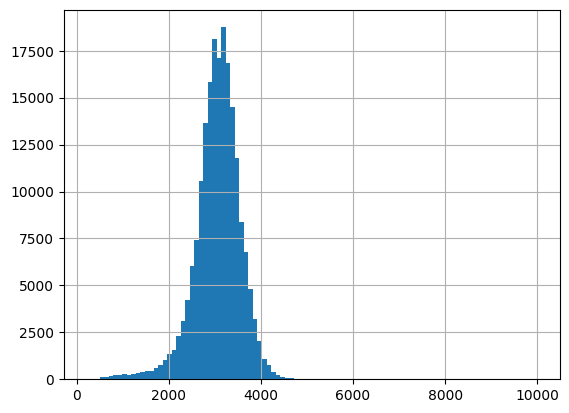

In [ ]:
tabla_regresion["peso_nac"].hist(bins = 100)

<Axes: >

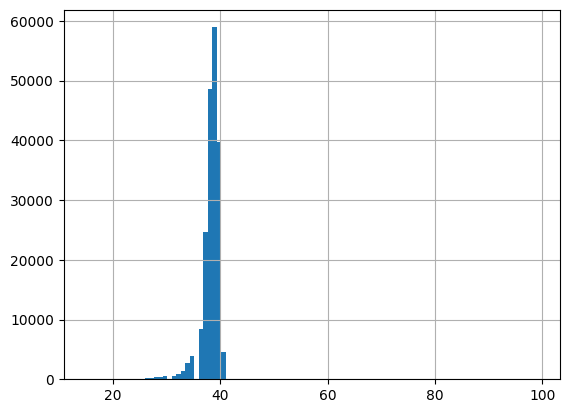

In [ ]:
tabla_regresion["t_ges"].hist(bins = 100)

<Axes: >

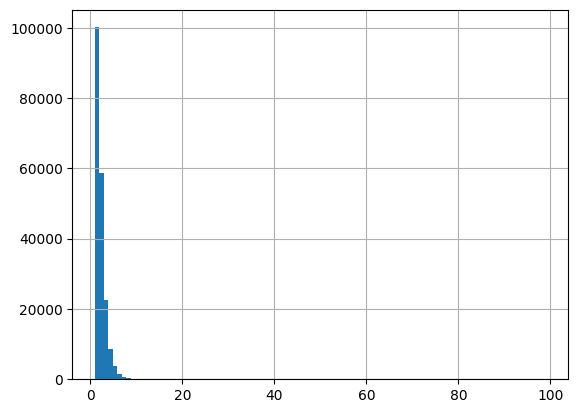

In [ ]:
tabla_regresion["n_emb"].hist(bins = 100)

<Axes: >

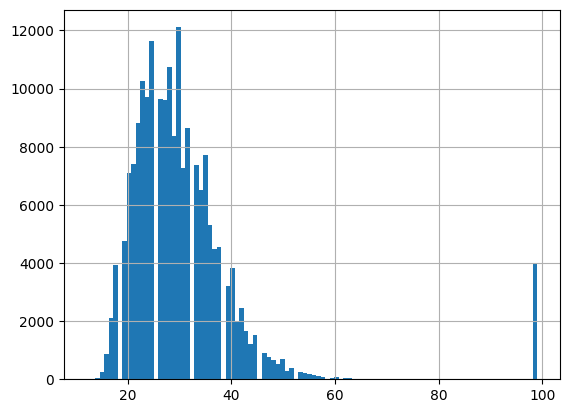

In [ ]:
edad_padre = tabla_regresion[(tabla_regresion["edad_padre"] < 100)]
edad_padre["edad_padre"].hist(bins = 100)

In [ ]:
tabla_regresion1 = tabla_regresion[(tabla_regresion["peso_nac"] < 6000) & (tabla_regresion["t_ges"] < 60) &  (tabla_regresion["n_emb"] < 30) &
                                   (tabla_regresion["n_hijosv"] < 30) & (tabla_regresion["edad_madre"] < 60) &
                                    (tabla_regresion["edad_padre"] < 60) & (tabla_regresion["talla_nac"] < 80)]
tabla_regresion1.head(5)

,peso_nac,t_ges,talla_nac,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,,
1,1070,30,38,4,3,39,42
2,2900,40,47,1,1,21,25
3,2510,36,48,2,2,37,34
4,3400,41,50,1,1,22,24
5,3760,39,53,3,3,40,41


In [ ]:
x = np.array(tabla_regresion1["t_ges"]).reshape(-1,1)
y = tabla_regresion1["peso_nac"]
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.2, random_state = 0)
modelo_lineal0 = LinearRegression()
regresion0 = modelo_lineal0.fit(trainx, trainy)
pred_lineal = regresion0.predict(testx)

In [ ]:
x0 = np.array(tabla_regresion1["t_ges"]).reshape(-1,1)
y0 = tabla_regresion1["peso_nac"]
modelo_lineal01 = LinearRegression()
regresion01 = modelo_lineal01.fit(x0, y0)
pred_lineal01 = regresion01.predict(x0)

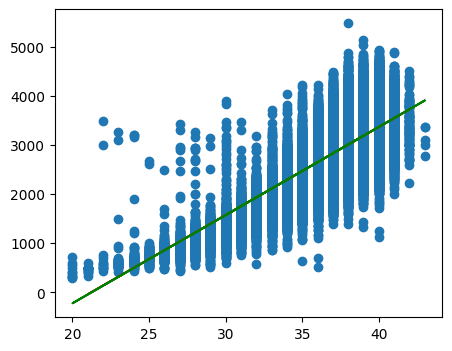

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["t_ges"], tabla_regresion1["peso_nac"])
plt.plot(testx, pred_lineal, linestyle='-', color = "red")
plt.plot(tabla_regresion1["t_ges"], pred_lineal01, linestyle='-', color = "green")
plt.show()

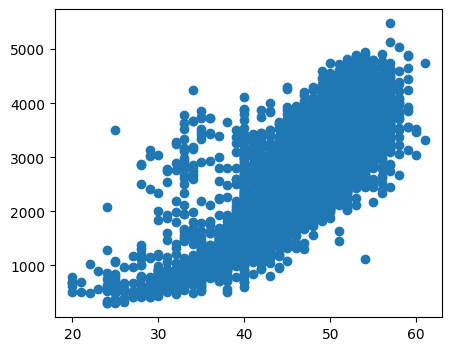

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["talla_nac"], tabla_regresion1["peso_nac"])
# plt.plot(tabla_regresion1["t_ges"], pred_lineal, linestyle='-', color = "red")
plt.show()

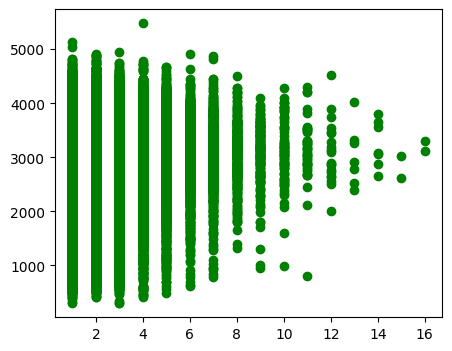

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["n_emb"], tabla_regresion1["peso_nac"], c = "green")
plt.show()

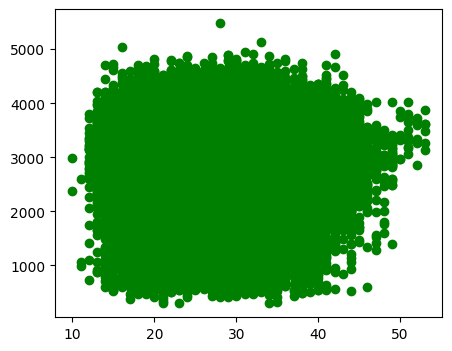

In [ ]:
plt.figure(figsize=(5, 4))
plt.scatter(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"], c = "green")
plt.show() # Peso de nacimiento no depende de la edad de la madre

In [ ]:
X = tabla_regresion1.drop("peso_nac", axis = 1)
Y = tabla_regresion1["peso_nac"]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.2, random_state = 0)
trainX.head(4)

,t_ges,talla_nac,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,
87855,40,48,1,1,34,27
74165,40,52,2,2,20,38
95380,38,49,1,1,23,24
188286,40,49,2,2,22,23


In [ ]:
# import numpy as np
modelo_lineal = LinearRegression()
regresion = modelo_lineal.fit(trainX, trainY)
pred_lineal = regresion.predict(testX)
# regresion = modelo_lineal.fit(np.array(tabla_regresion1["t_ges"]).reshape(-1, 1), np.array(tabla_regresion1["peso_nac"]).reshape(-1, 1))
# pred_lineal = regresion.predict(np.array(tabla_regresion1["t_ges"]).reshape(-1, 1))
# pred_lineal

In [ ]:
r2_lineal = regresion.score(testX, testY)
r2_lineal

0.6656774098880752

In [ ]:
X.head(4)

,t_ges,talla_nac,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,
1,30,38,4,3,39,42
2,40,47,1,1,21,25
3,36,48,2,2,37,34
4,41,50,1,1,22,24


In [ ]:
X1 = tabla_regresion1[['t_ges', 'n_emb', 'n_hijosv', 'edad_madre', 'edad_padre']]
Y1 = tabla_regresion1["peso_nac"]
train1X, test1X, train1Y, test1Y = train_test_split(X1, Y1, test_size = 0.2, random_state = 0)
train1X.head(4)

,t_ges,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,
87855,40,1,1,34,27
74165,40,2,2,20,38
95380,38,1,1,23,24
188286,40,2,2,22,23


In [ ]:
modelo_lineal1 = LinearRegression()
regresion1 = modelo_lineal1.fit(train1X, train1Y)
pred_lineal1 = regresion1.predict(test1X)
r2_lineal1 = regresion1.score(test1X, test1Y)
r2_lineal1

0.4651789899454738

In [ ]:
X2 = tabla_regresion1[['talla_nac', 'n_emb', 'n_hijosv', 'edad_madre', 'edad_padre']]
Y2 = tabla_regresion1["peso_nac"]
train2X, test2X, train2Y, test2Y = train_test_split(X2, Y2, test_size = 0.2, random_state = 0)
modelo_lineal2 = LinearRegression()
regresion2 = modelo_lineal2.fit(train2X, train2Y)
r2_lineal2 = regresion2.score(test2X, test2Y)
r2_lineal2

0.6213003289755861

In [ ]:
X3 = tabla_regresion1[['talla_nac', 'n_emb', 'n_hijosv', 't_ges', 'edad_padre']]
Y3 = tabla_regresion1["peso_nac"]
train3X, test3X, train3Y, test3Y = train_test_split(X3, Y3, test_size = 0.2, random_state = 0)
modelo_lineal3 = LinearRegression()
regresion3 = modelo_lineal3.fit(train3X, train3Y)
r2_lineal3 = regresion3.score(test3X, test3Y)
r2_lineal3

0.6655803755005829

In [ ]:
XY, Z = tabla_regresion1[["talla_nac", "t_ges"]], tabla_regresion1["peso_nac"]
trainXY, testXY, trainZ, testZ = train_test_split(XY, Z, test_size = 0.2, random_state = 0)
trainXY.head(4)

,talla_nac,t_ges
id,,
87855,48,40
74165,52,40
95380,49,38
188286,49,40


In [ ]:
modelo1 = LinearRegression()
modelo1.fit(trainXY, trainZ) # Entrenamos el modelo

LinearRegression()

In [ ]:
modelo1.score(testXY, testZ)

0.6630268594839737

In [ ]:
array = modelo1.coef_
array

array([109.24330653,  72.47710783])

<Axes: >

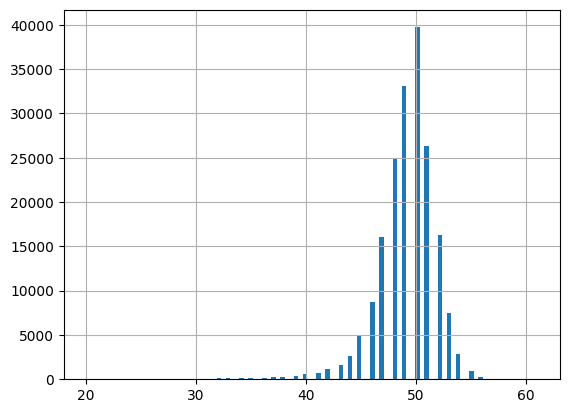

In [ ]:
tabla_regresion1["talla_nac"].hist(bins = 100)

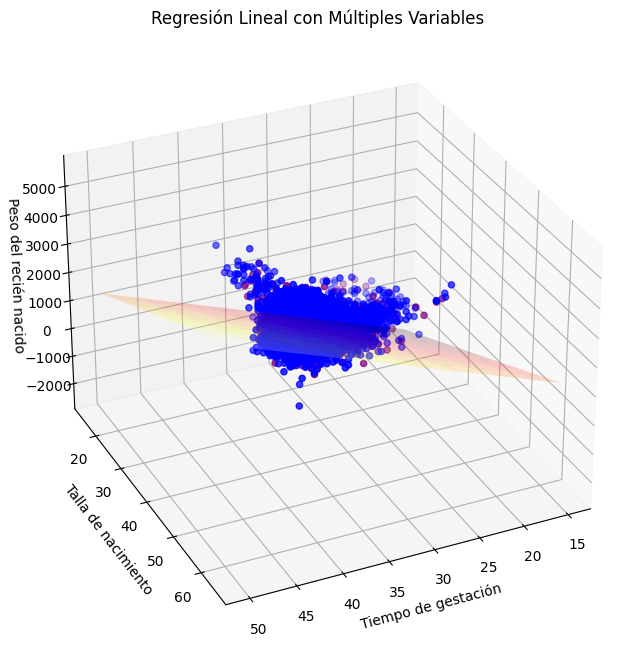

In [ ]:
fig = plt.figure(figsize=((10,8)))
ax = fig.add_subplot(projection='3d')
xx, yy = np.meshgrid(np.linspace(15, 50, num=10), np.linspace(15, 65, num=10))
plano_reg = array[0]*xx + array[1]*yy + modelo1.intercept_

ax.plot_surface(xx, yy, plano_reg, alpha=0.2, cmap='hot')
ax.scatter(trainXY["t_ges"], trainXY["talla_nac"], trainZ, c='blue',s=20)
ax.scatter(testXY["t_ges"], testXY["talla_nac"], testZ, c='purple',s=20)
ax.view_init(elev=30., azim=65)

ax.set_xlabel('Tiempo de gestación')
ax.set_ylabel('Talla de nacimiento')
ax.set_zlabel('Peso del recién nacido')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [104]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(10,10,10,10,10,10,10, 10, 10, 10),
                       max_iter = 500, activation = 'relu',
                       solver = 'adam', learning_rate = 'invscaling')
mlp_reg.fit(trainX, trainY) #

MLPRegressor(hidden_layer_sizes=(10, 10, 10, 10, 10, 10, 10, 10, 10, 10),
             learning_rate='invscaling', max_iter=500)

In [105]:
mlp_reg.score(testX, testY)

0.6679075049950222

In [97]:
X.head(4)

,t_ges,talla_nac,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,
1,30,38,4,3,39,42
2,40,47,1,1,21,25
3,36,48,2,2,37,34
4,41,50,1,1,22,24


In [98]:
no_obs = np.array([[30, 60, 3, 3, 19, 45]])
print('Se espera que el recién nacido pese', mlp_reg.predict(no_obs), 'bajo el perceptrón multicapa y ',
      modelo_lineal.predict(no_obs), "bajo el modelo de regresión lineal múltiple.")

Se espera que el recién nacido pese [3490.1987787] bajo el perceptrón multicapa y  [3663.37144284] bajo el modelo de regresión lineal múltiple.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [100]:
pearson_corr = np.corrcoef(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"])[0, 1]
pearman_corr, _ = spearmanr(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"])
kendall_corr, _ = kendalltau(tabla_regresion1["edad_madre"], tabla_regresion1["peso_nac"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr}, {pearman_corr} y {kendall_corr}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.03658032412955744, 0.05427906610128328 y 0.03726770869023116.


In [101]:
pearson_corr1 = np.corrcoef(tabla_regresion1["talla_nac"], tabla_regresion1["peso_nac"])[0, 1]
pearman_corr1, _ = spearmanr(tabla_regresion1["talla_nac"], tabla_regresion1["peso_nac"])
kendall_corr1, _ = kendalltau(tabla_regresion1["talla_nac"], tabla_regresion1["peso_nac"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr1}, {pearman_corr1} y {kendall_corr1}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.7882798916734262, 0.7087698775759284 y 0.5563931153963929.


In [102]:
pearson_corr2 = np.corrcoef(tabla_regresion1["t_ges"], tabla_regresion1["peso_nac"])[0, 1]
pearman_corr2, _ = spearmanr(tabla_regresion1["t_ges"], tabla_regresion1["peso_nac"])
kendall_corr2, _ = kendalltau(tabla_regresion1["t_ges"], tabla_regresion1["peso_nac"])
print(f"Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente {pearson_corr2}, {pearman_corr2} y {kendall_corr2}.")

Los coeficientes de correlación de Pearson, Spearman y Kendall son respectivamente 0.6746124185063106, 0.5148555052370335 y 0.3984321577818841.


In [103]:
tabla_regresion2 = tabla_regresion[(tabla_regresion["peso_nac"] > 6000) & (tabla_regresion["t_ges"] < 60) &  (tabla_regresion["n_emb"] < 30) &
                                   (tabla_regresion["n_hijosv"] < 30) & (tabla_regresion["edad_madre"] < 60) &
                                    (tabla_regresion["edad_padre"] < 60) & (tabla_regresion["talla_nac"] < 80)]
tabla_regresion2.head(10)

,peso_nac,t_ges,talla_nac,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,,
26960,9999,24,27,1,1,21,24
55377,9999,25,27,1,1,26,32
55378,9999,27,28,1,1,31,31
62682,9999,24,26,3,2,32,37


In [107]:
X_no = tabla_regresion2.drop("peso_nac", axis = 1)
mlp_reg.predict(X_no)

array([649.00686678, 653.86161038, 704.05992516, 482.65602234])

In [109]:
tabla_regresion2["peso_nac"] = mlp_reg.predict(X_no)
tabla_regresion2

<ipython-input-109-7e912ffb6437>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla_regresion2["peso_nac"] = mlp_reg.predict(X_no)


,peso_nac,t_ges,talla_nac,n_emb,n_hijosv,edad_madre,edad_padre
id,,,,,,,
26960,649.006867,24,27,1,1,21,24
55377,653.861610,25,27,1,1,26,32
55378,704.059925,27,28,1,1,31,31
62682,482.656022,24,26,3,2,32,37
